Jamboard Link : 
https://jamboard.google.com/d/1awzVUvrSGEMkxgKJMJs3greWM0ov1AJVDaI3WxXT-l0/edit?usp=sharing

In [1]:
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = np.random.normal(loc=0,scale=1, size=10)

# Mean Standard

In [3]:
sum(X)/len(X)

-0.3129523301534859

In [4]:
np.mean(X)

-0.3129523301534859

In [5]:
X.mean()

-0.3129523301534859

In [6]:
pd.Series(X).mean()

-0.3129523301534859

In [7]:
X[1] = np.nan

In [8]:
X.mean()

nan

In [9]:
pd.Series(X).mean()

-0.18804165100234613

In [10]:
X

array([-0.91947866,         nan, -1.91757514,  1.48943809,  2.3626365 ,
       -0.1093178 , -1.67128582, -0.42783598, -0.72664233,  0.22768628])

# Median

In [11]:
X = np.random.normal(loc=0,scale=1,size=10)

In [12]:
X.mean()

-0.019980385604142396

In [13]:
np.quantile(X,0.5)

-0.24780377002317927

In [14]:
statistics.median(X)

-0.24780377002317927

In [15]:
np.median(X)

-0.24780377002317927

In [16]:
pd.Series(X).median()

-0.24780377002317927

# Mode

In [17]:
X_mode = [1,2,2,3,3,3,4,4,4,4]

In [18]:
statistics.mode(X_mode)

4

In [19]:
mode_scipy = scipy.stats.mode(X_mode)

C:\Users\Dwi\AppData\Local\Temp\ipykernel_16504\1799685691.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_scipy = scipy.stats.mode(X_mode)


In [20]:
mode_scipy.mode

array([4])

In [21]:
X_mode = [1,2,2,3,3,3,3,4,4,4,4]
pd.Series(X_mode).mode()

0    3
1    4
dtype: int64

# Geometric Mean

In [22]:
X = np.random.randint(1,10,10)

In [23]:
X[-1] = 100

In [24]:
gmean = 1

for Xi in X:
    gmean *= Xi

gmean= gmean**(1/len(X))
print(gmean)

6.188003293490779


In [25]:
X.mean()

14.8

In [26]:
scipy.stats.gmean(X)

6.188003293490778

# Harmonic Mean

In [27]:
hmean = len(X) / sum(1/Xi for Xi in X)
print(hmean)

3.8019371775142576


In [28]:
hmean = scipy.stats.hmean(X)
print(hmean)

3.8019371775142576


In [29]:
X.sort()
X

array([  1,   2,   5,   5,   6,   7,   7,   7,   8, 100])

In [30]:
print("Mean: ", X.mean())
print("Gmean: ", gmean)
print("Hmean: ", hmean)

Mean:  14.8
Gmean:  6.188003293490779
Hmean:  3.8019371775142576


In [31]:
range = X.max() - X.min()

In [32]:
X

array([  1,   2,   5,   5,   6,   7,   7,   7,   8, 100])

In [33]:
np.ptp(X)

99

In [34]:
Q1 = np.quantile(X,0.25)
Q2 = np.quantile(X, .75)

print("IQR: ", Q2-Q1)

IQR:  2.0


In [35]:
np.quantile(X, 0.975) - np.quantile(X,0.025)

78.07500000000005

# Spread

Variance

In [36]:
X = np.random.random(100)

In [37]:
X.var(ddof=1)

0.08501028477405236

In [38]:
pd.Series(X).var()

0.08501028477405237

In [39]:
X.std(ddof=1)

0.2915652324507371

In [40]:
X.var(ddof=1)**0.5

0.2915652324507371

In [41]:
pd.Series(X).std()

0.2915652324507371

In [42]:
scipy.stats.median_abs_deviation(X)

0.25727029451928235

# Skew

In [43]:
X1 = scipy.stats.skewnorm.rvs(a=10,size=10000,loc=0)

C:\Users\Dwi\AppData\Local\Temp\ipykernel_16504\3947939701.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.displot(X1**0.5)


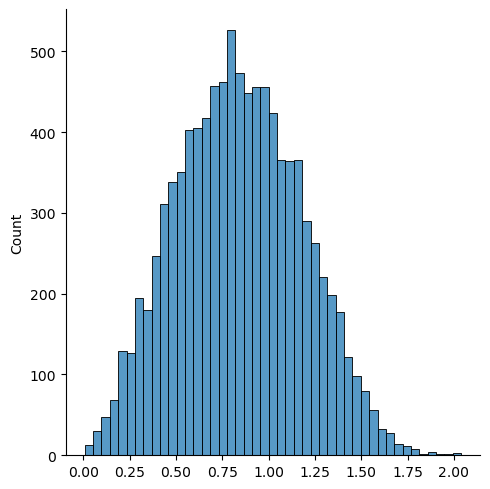

In [44]:
sns.displot(X1**0.5)

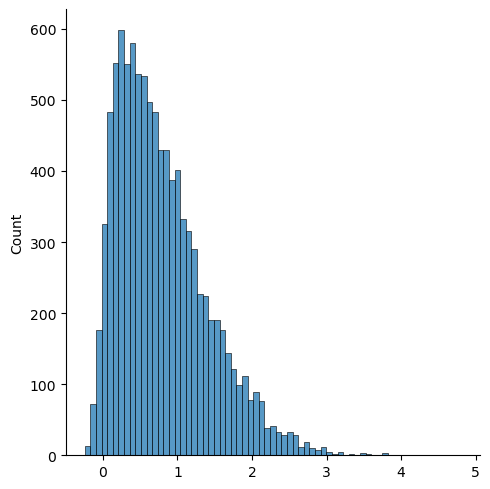

In [45]:
X2 = scipy.stats.skewnorm.rvs(a=10,size=10000,loc=0)
sns.displot(X2)

In [46]:
scipy.stats.skew(X2)

0.9932261606305137

In [47]:
scipy.stats.skew(X1)

0.9655380645008592

In [48]:
X1.mean()

0.790471223432178

In [49]:
X2.mean()

0.7933124211774623

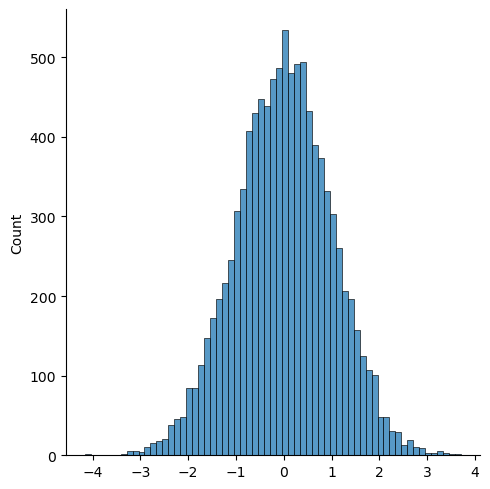

In [50]:
X = scipy.stats.skewnorm.rvs(a=0,size=10000,loc=0)
sns.displot(X)

In [51]:
scipy.stats.kurtosis(X)

0.027835320519799645

In [52]:
result = scipy.stats.describe(X, ddof=1, bias=False)
result

DescribeResult(nobs=10000, minmax=(-4.16677578377889, 3.714006960286122), mean=0.0009201659576333565, variance=1.0022649861594792, skewness=-0.01827671679392891, kurtosis=0.02844948327611574)

In [53]:
pd.Series(X).describe()

count    10000.000000
mean         0.000920
std          1.001132
min         -4.166776
25%         -0.669351
50%          0.011074
75%          0.678531
max          3.714007
dtype: float64

# Correlation

In [54]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 = 2*X + np.random.random(size=100)
Y3 = 2*X + np.random.random(size=100)

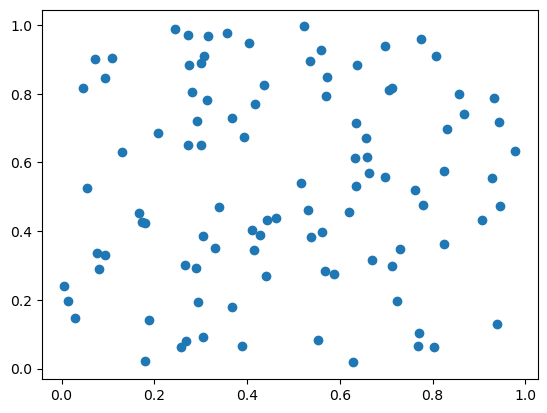

In [55]:
plt.scatter(x=X, y=Y1)

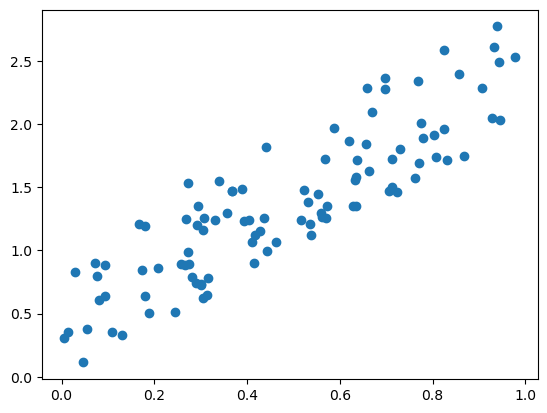

In [56]:
plt.scatter(x=X, y=Y2)

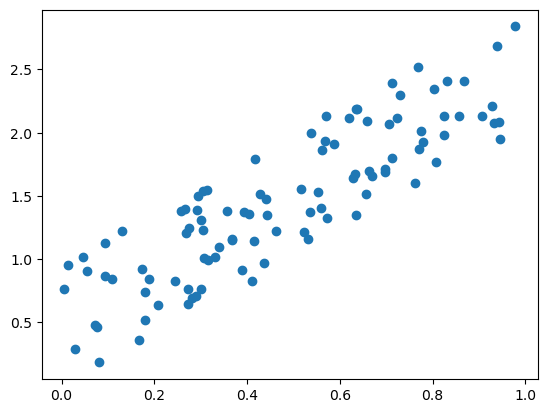

In [57]:
plt.scatter(x=X, y=Y3)

In [58]:
np.cov(X,Y3)[0,1]

0.13423058115054284

In [59]:
pd.Series(X).cov(pd.Series(Y3))

0.13423058115054284

In [60]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [61]:
np.cov(X,Y3)

array([[  8.64701444, -17.34832526],
       [-17.34832526,  34.89095539]])

In [62]:
X = np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [63]:
cov_xy = np.cov(X,Y2)[0,1]

In [64]:
#np.cov(X.Y2)

In [65]:
cov_xy / (X.std()* Y2.std())

0.8831200879741031

In [66]:
X = 10*np.random.random(size=100)

Y1 = np.random.random(size=100)

Y2 =   2*X + np.random.random(size=100)
Y3 = - 2*X + np.random.random(size=100)

In [67]:
cov_xy = np.cov(X,Y2)[0,1]

In [68]:
cov_xy / (X.std(ddof=1)*Y2.std(ddof=1))

0.9986911315588689

In [69]:
np.corrcoef(X,Y3)

array([[ 1.        , -0.99851656],
       [-0.99851656,  1.        ]])

In [70]:
np.corrcoef(X,Y2)[0,1]

0.998691131558869

In [71]:
scipy.stats.linregress(X,Y2).rvalue

0.998691131558869

# 2D

In [72]:
df = pd.DataFrame(
    {"A": X,
     "B": Y1,
     "C": Y2}
)
df.head()

,A,B,C
0,0.776604,0.888646,2.373537
1,8.770052,0.662436,18.047552
2,1.998664,0.305630,4.156689
3,5.584915,0.171100,11.202486
4,6.020779,0.873213,12.764852


In [73]:
df.describe()

,A,B,C
count,100.000000,100.000000,100.000000
mean,4.957481,0.473523,10.424339
std,2.631654,0.295055,5.314530
min,0.040168,0.000015,0.346203
25%,3.077342,0.229003,6.683858
50%,4.842361,0.438740,10.454734
75%,7.128672,0.742396,14.848562
max,9.966683,0.959738,20.106030


In [74]:
np.mean(df,axis=0)

A     4.957481
B     0.473523
C    10.424339
dtype: float64

In [75]:
df.median()

A     4.842361
B     0.438740
C    10.454734
dtype: float64

In [76]:
scipy.stats.gmean(df,axis=0)

array([3.86350945, 0.31455844, 8.47190593])

In [77]:
scipy.stats.hmean(df,axis=0)

array([1.62189952e+00, 1.51457434e-03, 5.47501014e+00])

In [78]:
scipy.stats.describe(df)

DescribeResult(nobs=100, minmax=(array([4.01678649e-02, 1.52818177e-05, 3.46202689e-01]), array([ 9.96668282,  0.95973842, 20.1060297 ])), mean=array([ 4.95748101,  0.4735231 , 10.42433928]), variance=array([ 6.92560298,  0.08705735, 28.24422755]), skewness=array([-0.05115302,  0.07208055, -0.07508475]), kurtosis=array([-1.00334497, -1.35246782, -1.01882116]))

In [79]:
df.corr()

,A,B,C
A,1.000000,0.181439,0.998691
B,0.181439,1.000000,0.179336
C,0.998691,0.179336,1.000000


<AxesSubplot:>

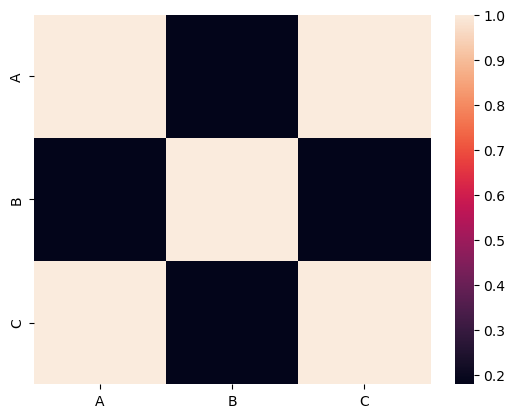

In [80]:
sns.heatmap(df.corr())